In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import pickle

In [2]:
df_05_charge = pd.read_csv('B0005_charge.csv')
df_05_discharge = pd.read_csv('B0005_discharge.csv')

df_06_charge = pd.read_csv("B0006_charge (1).csv")
df_06_discharge = pd.read_csv("B0006_discharge.csv")

df_07_charge = pd.read_csv("B0007_charge (1).csv")
df_07_discharge = pd.read_csv("B0007_discharge.csv")

df_18_discharge = pd.read_csv("B0018_discharge.csv")

## Steps of implementation
- Combine all the datasets
- split into train and test 
- have linear regression model 
- have a ridge rigression model 
- have a 10 depth random forest model
- make an accuracy metric
- make plots for all 

In [3]:
d = pd.merge(df_05_discharge,df_06_discharge,how='outer')

In [4]:
d.tail()

,cycle,amb_temp,date_time,voltage_battery,current_battery,temp_battery,current_load,voltage_load,time,capacity
331,607,24,"26 May 2008, 20:21:04",3.696674,-0.002457,32.416754,0.0008,0.0,2792.485,1.158797
332,611,24,"27 May 2008, 15:52:41",3.595365,-0.002342,34.556514,0.0006,0.0,2802.016,1.309015
333,611,24,"27 May 2008, 15:52:41",3.693059,-0.001245,32.371097,0.0006,0.0,2802.016,1.174975
334,613,24,"27 May 2008, 20:45:42",3.589937,-0.000583,34.405920,0.0006,0.0,2820.390,1.325079
335,613,24,"27 May 2008, 20:45:42",3.691809,-0.003127,32.192324,0.0006,0.0,2820.390,1.185675


In [58]:
d_final = pd.merge(d,df_07_discharge,how='outer')
d_final.tail()

d_final.to_csv('d_final.csv')

In [6]:
#splitting dataset into X and Y
X = d_final.iloc[:,[0,1,3,4,5,6,7]]
Y = d_final.iloc[:,-1]



In [21]:
# splitting datasets into training and testing data with a 70 30 train test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)




## Linear Regression

In [22]:
# Initializing and training the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train,Y_train)

LinearRegression()

In [23]:
# Evaluating error for Linear Regression
y_pred = linear_model.predict(X_test)
acc = mean_squared_error(Y_test,y_pred)
print(acc)

0.0014289684451686705


In [24]:
# Evaluating model based on r2 score
r2 = r2_score(Y_test,y_pred)
percentage_score = r2 * 100
print("the model is {0} percent accurage".format(percentage_score))

the model is 96.99164038673887 percent accurage


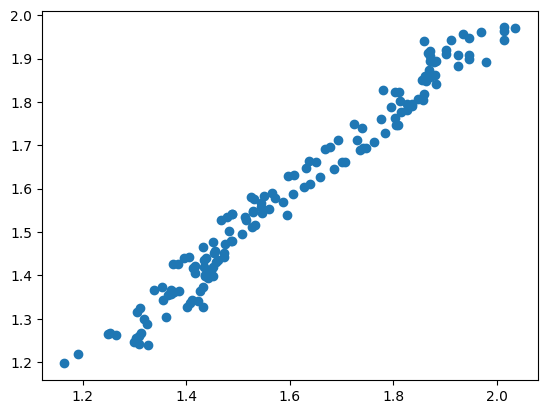

In [25]:
# Plotting Predicted vs actual values
plt.scatter(Y_test,y_pred)

In [37]:
# Pickling the model
with open('LinReg.pkl','wb') as f:
    pickle.dump(linear_model,f)

## Ridge Regression

In [26]:
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train,Y_train)

Ridge(alpha=0.01)

In [27]:
# Evaluating mean squared error for
ridge_y_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(Y_test,ridge_y_pred)

print(ridge_mse)

0.0014329702978017258


In [28]:
# Evaluating R2 score for ridge model 
r2_ridge = r2_score(Y_test,ridge_y_pred)
percentage_score = r2_ridge * 100
print("the Ridge regression model is {0} percent accurage".format(percentage_score))

the Ridge regression model is 96.9832154198474 percent accurage


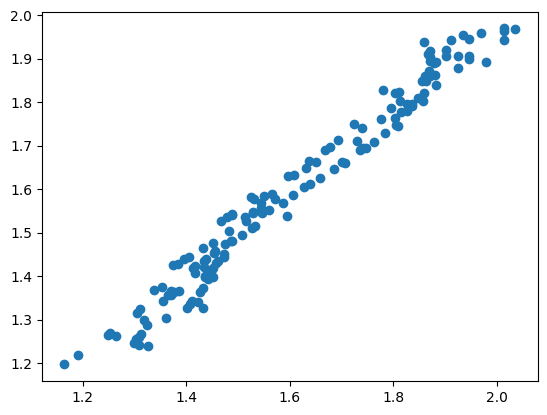

In [29]:
# Plotting Predicted vs actual values
plt.scatter(Y_test,ridge_y_pred)

In [38]:
# Pickling the model 
with open("RidgeReg.pkl","wb") as f:
    pickle.dump(ridge_model,f)

## Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X_train,Y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [32]:
# Evaluating mean squared error for random forest regressor
regr_y_pred = regr.predict(X_test)
regr_mse = mean_squared_error(Y_test,regr_y_pred)

print(regr_mse)

0.00026124170427138036


In [33]:
# Evaluating R2 score for random forest regressor
r2_regr = r2_score(Y_test,regr_y_pred)
percentage_score = r2_regr * 100
print("the Ridge regression model is {0} percent accurage".format(percentage_score))

the Ridge regression model is 99.45001655208925 percent accurage


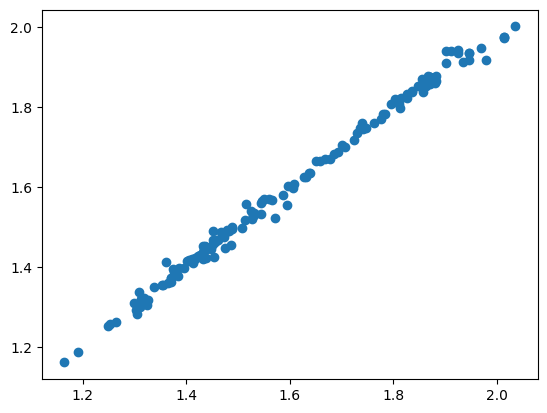

In [34]:
# Plotting Predicted vs actual values
plt.scatter(Y_test,regr_y_pred)

In [39]:
with open("RandomForestRegressor.pkl","wb") as f:
    pickle.dump(regr,f)

## Gradient Boost

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
GBR = GradientBoostingRegressor(random_state=0)
GBR.fit(X_train,Y_train)

GradientBoostingRegressor(random_state=0)

In [53]:
# Evaluating mean squared error for random forest regressor
GBR_y_pred = GBR.predict(X_test)
GBR_mse = mean_squared_error(Y_test,GBR_y_pred)

print(GBR_mse)

0.0002563008198129299


In [54]:
GBR_regr = r2_score(Y_test,GBR_y_pred)
percentage_score = GBR_regr * 100
print("the Ridge regression model is {0} percent accurage".format(percentage_score))

the Ridge regression model is 99.46041843136716 percent accurage


In [51]:
with open("GBR.pkl", "wb") as f:
    pickle.dump(GBR_regr)

TypeError: dump() missing required argument 'file' (pos 2)

In [55]:
r1 = d_final[['cycle']]
r2 = d_final['capacity']

In [56]:
r1.head()

,cycle
0,1
1,1
2,1
3,3
4,3


In [57]:
r2.head()

0    2.035338
1    1.891052
2    1.856487
3    2.025140
4    1.880637
Name: capacity, dtype: float64